In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [165]:
data = pd.read_csv("air_bnb.csv")
data = pd.DataFrame(data, columns =['id','host_id','neighbourhood_group','neighbourhood','room_type','calculated_host_listings_count','price','minimum_nights','number_of_reviews','availability_365'])
data.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,calculated_host_listings_count,price,minimum_nights,number_of_reviews,availability_365
0,2015,2217,Mitte,Brunnenstr. Süd,Entire home/apt,4,60,4,118,141
1,2695,2986,Pankow,Prenzlauer Berg Nordwest,Private room,1,17,2,6,0
2,3176,3718,Pankow,Prenzlauer Berg Südwest,Entire home/apt,1,90,62,143,220
3,3309,4108,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,1,26,5,25,297
4,7071,17391,Pankow,Helmholtzplatz,Private room,1,42,2,197,26


#KORELASI DATA

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

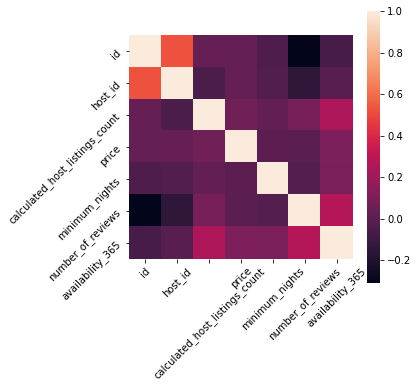

In [166]:
import seaborn as sns
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(5, 5))
ax = sns.heatmap(corr, vmax=1, square=True)
#ax.set_xtickLabels(rotation=30)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [167]:
corr

,id,host_id,calculated_host_listings_count,price,minimum_nights,number_of_reviews,availability_365
id,1.000000,0.527680,0.038248,0.030992,-0.041777,-0.308877,-0.059485
host_id,0.527680,1.000000,-0.048570,0.037808,-0.028396,-0.148577,-0.009365
calculated_host_listings_count,0.038248,-0.048570,1.000000,0.073244,0.027285,0.085898,0.252414
price,0.030992,0.037808,0.073244,1.000000,0.003626,-0.001235,0.105959
minimum_nights,-0.041777,-0.028396,0.027285,0.003626,1.000000,-0.021685,0.099350
number_of_reviews,-0.308877,-0.148577,0.085898,-0.001235,-0.021685,1.000000,0.277621
availability_365,-0.059485,-0.009365,0.252414,0.105959,0.099350,0.277621,1.000000


#CLUSTERING

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [0]:
DataClus = pd.DataFrame(data, columns =['number_of_reviews','availability_365'])
DataClus.to_csv("DatasetClusterring.csv", index=False)

In [170]:

dataclustering = pd.read_csv("DatasetClusterring.csv")
dataclustering.head()

,number_of_reviews,availability_365
0,118,141
1,6,0
2,143,220
3,25,297
4,197,26


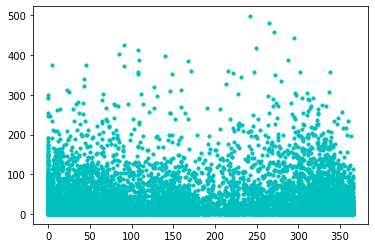

In [171]:
plt.scatter (dataclustering.availability_365, dataclustering.number_of_reviews, s = 10, c = "c", marker = "o", alpha = 1)
plt.show()

In [172]:
dataclusteringx = dataclustering.iloc[:, 0:2]
dataclusteringx.head()

,number_of_reviews,availability_365
0,118,141
1,6,0
2,143,220
3,25,297
4,197,26


In [173]:
x_array = np.array(dataclustering)
print(x_array)

[[118 141]
 [  6   0]
 [143 220]
 ...
 [  0  15]
 [  0   6]
 [  0  21]]


In [174]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.23694779, 0.38630137],
       [0.01204819, 0.        ],
       [0.28714859, 0.60273973],
       ...,
       [0.        , 0.04109589],
       [0.        , 0.01643836],
       [0.        , 0.05753425]])

In [175]:
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [176]:
print(kmeans.cluster_centers_)

[[0.01669417 0.01139172]
 [0.04794507 0.51669326]
 [0.04488982 0.88601483]
 [0.0643475  0.21763222]
 [0.36881342 0.7602078 ]]


In [0]:
dataclustering["kluster"] = kmeans.labels_

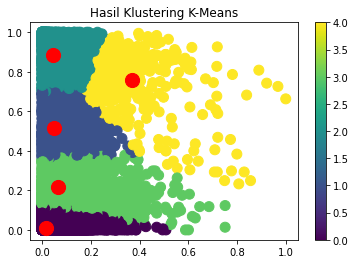

In [178]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = dataclustering.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [0]:
#CLUSTERING 2

In [0]:
DataClus = pd.DataFrame(data, columns =['number_of_reviews','availability_365'])
DataClusNew = np.array(DataClus)

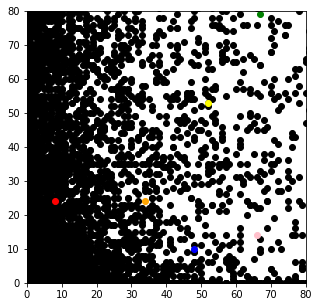

In [181]:
## Initialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': DataClusNew[:,0],
    'y': DataClusNew[:,1]
})


np.random.seed(100)
k = 6
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'yellow', 5: 'pink', 6: 'orange'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

     x    y  distance_from_1  ...  distance_from_6  closest  color
0  118  141       160.589539  ...       144.031247        2      g
1    6    0        24.083189  ...        36.878178        1      r
2  143  220       237.993697  ...       224.269927        2      g
3   25  297       273.528792  ...       273.148311        2      g
4  197   26       189.010582  ...       163.012269        5   pink

[5 rows x 10 columns]


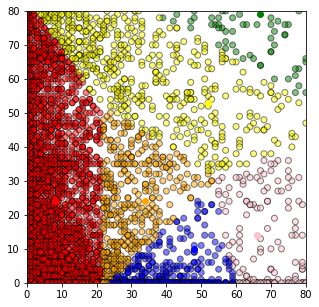

In [182]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

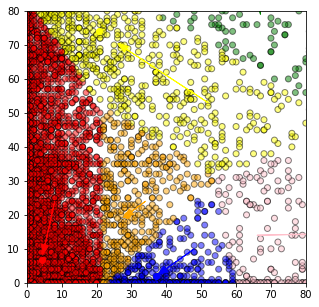

In [183]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

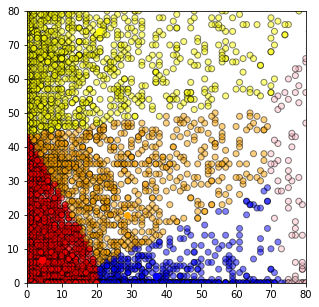

In [184]:
df = assignment(df, centroids)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

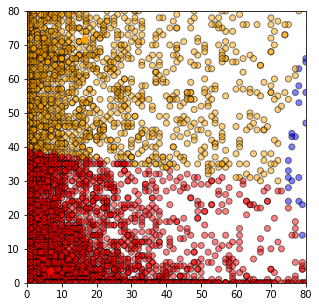

In [185]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

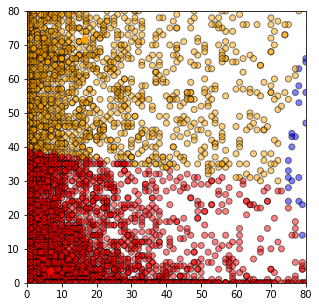

In [186]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

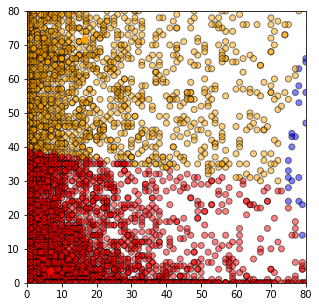

In [187]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()